Task 2

Loading data + debugging

In [1]:
from IPython.display import display
import pandas as pd

# Load the data from the CSV file for road distances
file_path = 'process2.csv'
print(f"Loading data from: {file_path}")
data = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows of the data
display(data.head())

Loading data from: process2.csv


,Line,Direction,Station from (A),Station to (B),Distance (Kms),Un-impeded Running Time (Mins),AM peak (0700-1000) Running Time (Mins),Inter peak (1000 - 1600) Running time (mins)
0,Bakerloo,Southbound,HARROW & WEALDSTONE,KENTON,1.74,2.23,2.50,2.50
1,Bakerloo,Southbound,KENTON,SOUTH KENTON,1.40,1.88,2.00,2.00
2,Bakerloo,Southbound,SOUTH KENTON,NORTH WEMBLEY,0.90,1.50,1.50,1.50
3,Bakerloo,Southbound,NORTH WEMBLEY,WEMBLEY CENTRAL,1.27,1.92,2.06,2.06
4,Bakerloo,Southbound,WEMBLEY CENTRAL,STONEBRIDGE PARK,1.71,2.23,3.13,3.13


Loading Station Coordinates + debugging

In [26]:
# Load station coordinates 
coordinates_file = 'stations.csv'
print(f"Loading coordinates from: {coordinates_file}")
coordinates_data = pd.read_csv(coordinates_file)

# Display the first few rows of the coordinates data
display(coordinates_data.head())


Loading coordinates from: stations.csv


,Station,OS X,OS Y,Latitude,Longitude,Zone,Postcode
0,ABBEY ROAD,539081,183352,51.531952,0.003723,3,E15 3NB
1,ABBEY WOOD,547297,179002,51.490784,0.120272,4,SE2 9RH
2,ACTON CENTRAL,520613,180299,51.508757,-0.263430,2,W3 6BH
3,ACTON MAIN LINE,520296,181196,51.516886,-0.267690,3,W3 9EH
4,ACTON TOWN,519457,179639,51.503071,-0.280303,3,W3 8HN


Creating Graph and Adding Nodes and Edges:

In [32]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add edges and distances
for _, row in data.iterrows():
    G.add_edge(row['Station from (A)'], row['Station to (B)'], weight=row['Distance (Kms)'], line=row['Line'])

Mapping Station Coordinates to Node Positions:

In [29]:
# Create a dictionary of station coordinates
station_coordinates = {}
for _, row in coordinates_data.iterrows():
    station_coordinates[row['Station']] = (row['Longitude'], row['Latitude'])

# Use station coordinates for node positions, with a default position for missing nodes
default_position = (0, 0)  
pos = {node: station_coordinates.get(node, default_position) for node in G.nodes()}


Visualizing the Graph:

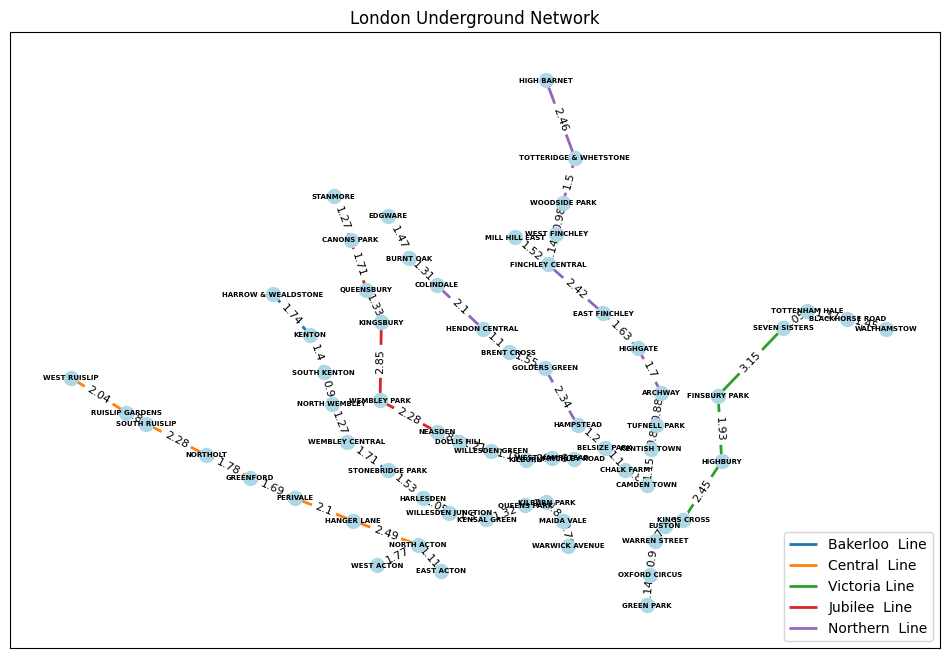

In [35]:
import matplotlib.pyplot as plt

# Define colors for each line
unique_lines = data['Line'].unique()
line_colors = plt.cm.tab10.colors[:len(unique_lines)]  # Using a colormap to automatically assign colors

# Draw the graph with edges colored by line
plt.figure(figsize=(12, 8))

for i, line in enumerate(unique_lines):
    line_data = data[data['Line'] == line]
    edges = [(row['Station from (A)'], row['Station to (B)']) for _, row in line_data.iterrows()]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=line_colors[i], width=2, label=f'{line} Line')

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightblue')

# Draw node labels with adjusted alignments
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=5, ha='center', va='center', fontweight='bold')

# Draw the edge labels
edge_labels = {(row['Station from (A)'], row['Station to (B)']): row['Distance (Kms)'] for _, row in data.iterrows()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='black')

# Add legend and title
plt.legend(scatterpoints=1, loc='lower right', ncol=1, fontsize=10)
plt.title('London Underground Network')

# Display the plot
plt.show()


In [31]:
# Calculate total length of the transport network
total_length = sum(data['Distance (Kms)'])

# Calculate average distance between the stations
average_distance = total_length / len(data)

# Calculate standard deviation of the distances between the stations
distances_list = data['Distance (Kms)'].tolist()
standard_deviation = np.std(distances_list)

# Print the results
print("Total length of the transport network:", total_length)
print("Average distance between the stations:", average_distance)
print("Standard deviation of the distances between the stations:", standard_deviation)


Total length of the transport network: 89.53
Average distance between the stations: 1.4677049180327868
Standard deviation of the distances between the stations: 0.572665305628772
